## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [25]:
X = np.array(dataset.iloc[:,1:-1]) # [semua baris, semua kolom kecuali y]
y = np.array(dataset.iloc[:,-1]) # [semua baris, kolom yg terakhir saja (y)]

In [26]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [27]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [28]:
y = y.reshape(len(y), 1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [30]:
# cara 1
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
y = sc.fit_transform(y)
print(X)
print()
print(y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [7]:
# cara 2
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [8]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [9]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training SVR model on the whole dataset

In [10]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf') # radial basis function
# X, y di sini adalah X, y yang sudah mengalami transformasi scaling
regressor.fit(X,y)

/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [32]:
# print(SVR.__doc__)

## Predicting a single result

In [11]:
# 1 --> scallar
# [1] --> 1D array
# [[2]] --> 2D array
# regressor.predict(sc_X.transform([[6.5]])) # harus diubah jadi matrix
# np.array(regressor.predict(sc_X.transform([[6.5]])))
# regressor.predict(sc_X.transform([[6.5]])).reshape(1,1)
# sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(1,1)) # param matrix
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1, 1))

array([[170370.0204065]])

## Visualising SVR Results

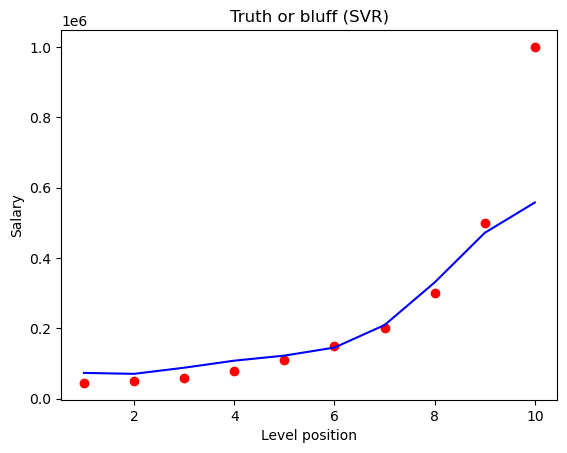

In [13]:
# grafik scatter
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = "red")
# grafik linier regresi
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1, 1)), color = 'blue')
plt.title('Truth or bluff (SVR)')
plt.xlabel('Level position')
plt.ylabel('Salary')
plt.show()

## Visualising SVR Results (high resolution)

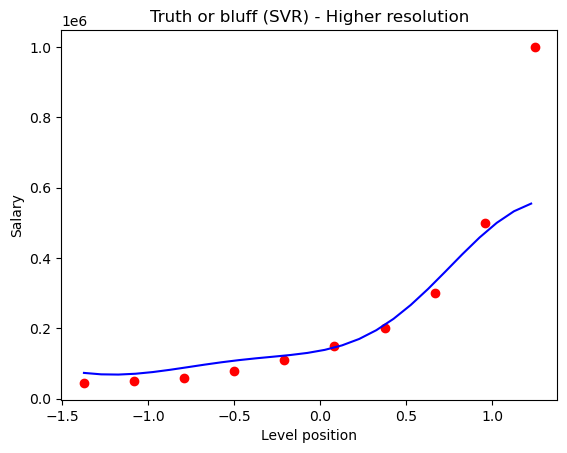

In [24]:
X_grid = np.arange(min(sc_X.inverse_transform(X)),max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
#plt.scatter(X, y, color = "red")
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = "red")
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1, 1)), color = 'blue')
plt.title('Truth or bluff (SVR) - Higher resolution')
plt.xlabel('Level position')
plt.ylabel('Salary')
plt.show()